Importation des bibliothèques nécessaires

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import itertools
import numpy as np

Fonction pour générer des valeurs aléatoires

In [ ]:
def generate_random(x):
  test = []
  for _ in range(x):
    random_number = random.randint(1, 10) # genere des nums entre 1 et 10
    test.append(random_number)
  return test

Fonction pour générer des valeurs aléatoires

In [ ]:
def generate_random_client(x):
    test = []
    while len(test) < x:
        random_number = random.randint(1, 10)
        if random_number not in test:
            test.append(random_number)
    return test

Fonction pour générer la population avec un taille donnée

In [ ]:
def generate_population(clients, population_size):
    population = []
    for _ in range(population_size):
        random.shuffle(clients)  # Mélange aléatoire des coordonnées des clients
        population.append(list(clients))  # Ajout d'un individu à la population
    return population

Fonction pour calculer la distance entre paires de clients

In [ ]:
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

Fonction pour calculer la matrice de distance entre les clients

In [ ]:
def calculate_distance_matrix(client_coordinates):
    num_clients = len(client_coordinates)
    distance_matrix = [[0] * num_clients for _ in range(num_clients)]

    for i in range(num_clients):
        for j in range(num_clients):
            if i != j:
                x1, y1 = client_coordinates[i]
                x2, y2 = client_coordinates[j]
                distance = calculate_distance(x1, y1, x2, y2)
                distance_matrix[i][j] = distance

    return distance_matrix

Fonction pour calculer la matrice de distance de la consommation d'énergie

In [ ]:
def calculate_energy_consumption(speed, consumption_rate, distance_matrix):
    energy_matrix = []

    for i in range(len(distance_matrix)):
        energy_row = [distance * consumption_rate / speed for distance in distance_matrix[i]]
        energy_matrix.append(energy_row)

    return energy_matrix


Evaluation de la population

In [ ]:
def evaluate_population(client_coordinates, speed, consumption_rate, population):
    distances = []
    energies = []
    fitness_scores = []

    distance_matrix = calculate_distance_matrix(client_coordinates)
    energy_matrix = calculate_energy_consumption(speed, consumption_rate, distance_matrix)

    for individual in population:

        energy = sum(energy_matrix[i][j] for i, j in zip(individual[:-1], individual[1:]))
        fitness_score = 1/(energy)
        energies.append(energy)
        fitness_scores.append(fitness_score)

    return  energies, fitness_scores

Evaluation de chaque individu (fitness score)

In [ ]:
def evaluate_fitness(individual, client_coordinates, speed, consumption_rate):

    distance_matrix = calculate_distance_matrix(client_coordinates)
    energy_matrix = calculate_energy_consumption(speed, consumption_rate, distance_matrix)


    energy = sum(energy_matrix[individual[i]][individual[i+1]] for i in range(len(individual) - 1))

    # Fitness score is a combination of distance and energy
    fitness_score = 1/(energy)

    return fitness_score


Séléctionner les parents

In [ ]:

def select_parents(population, num_parents):
    parents = random.sample(population, num_parents)
    return parents

croisement des meilleurs parents pour générer les child (croisement avec deux points aléatoires)

In [ ]:
import time
def crossover(parents, crossover_rate):
    start_time = time.time()
    num_parents = len(parents)
    num_genes = len(parents[0])  # Nombre de gènes dans chaque parent

    children = []

    for i in range(num_parents):
        parent1 = parents[i]
        parent2 = parents[(i + 1) % num_parents]  # Sélection du parent suivant pour assurer une boucle

        if random.random() > crossover_rate:
            children.append(parent1)
            continue

        # Création d'un tableau vide pour stocker les gènes déjà utilisés
        used_genes = set()

        # Génération de deux points de coupure uniques
        point1, point2 = sorted(random.sample(range(1, num_genes - 1), 2))

        # Création de l'enfant en préservant l'ordre des gènes de parent1 et en ajoutant les gènes de parent2
        child = []
        for gene in parent1[:point1]:
            child.append(gene)
            used_genes.add(gene)

        for gene in parent2:
            if gene not in used_genes:
                child.append(gene)
                used_genes.add(gene)

        for gene in parent1[point2:]:
            if gene not in used_genes:
                child.append(gene)
                used_genes.add(gene)

        children.append(child)
    end_time = time.time()
    execution_time = (end_time - start_time) * 1000  # Convertir en millisecondes
    print("Temps d'exécution de crossover:", execution_time, "millisecondes")
    return children


Fonction de mutation qui permet de changer les position des gènes trouver dans child de manière aléatoire

In [ ]:
def mutation(children, mutation_rate):
    mutated_children = []

    for child in children:
        if random.random() <= mutation_rate:
            mutated_child = list(child)  # Convertir en une liste modifiable

            # Générer deux positions de gènes uniques
            gene_pos1, gene_pos2 = random.sample(range(len(child)), 2)

            # Échanger les positions des gènes
            mutated_child[gene_pos1], mutated_child[gene_pos2] = mutated_child[gene_pos2], mutated_child[gene_pos1]

            mutated_children.append(mutated_child)
        else:
            mutated_children.append(child)

    return mutated_children

Données (paramètres d'entrées)

In [ ]:
clients = generate_random_client(10) # les indices des clients
population_size = 50 # taille de la population
client_coordinates = {0: (0, 0), 1: (16, 68), 2: (80, 81), 3: (83, 44), 4: (62, 13), 5: (70, 8), 6: (52, 28),  7: (82, 84), 8: (50, 14), 9: (70, 77), 10: (8, 9)}
demands = [4, 5, 18, 46, 25, 56, 13, 23, 16, 10 ] # les demandes des clients
capacity = (2/3) * sum (demands) # capacité maximale
k = 3
num_parents = 2 # nombre de parents choisi
crossover_rate = 0.8 # taux de croisement
mutation_rate = 0.2 # taux de mutation
num_generations = 100 # nombre de génération
speed = 80 # vitesse
consumption_rate = 0.1  # consommation spécifique en kWh/km

In [ ]:
population = generate_population(clients, population_size)
# Afficher chaque individu
for individual in population:
    print(individual)

distance_matrix = calculate_distance_matrix(client_coordinates)
for row in distance_matrix:
  print(row)

energy_matrix = calculate_energy_consumption(speed, consumption_rate, distance_matrix)
for row in energy_matrix:
  print(row)

energies, fitness_scores = evaluate_population(client_coordinates, speed, consumption_rate, population)

for i in range(len(population)):
    print(f"Individu {i+1} -  Consommation d'énergie : {energies[i]}, Fitness Score : {fitness_scores[i]}")

parents = select_parents(population, num_parents)
for parent in parents:
    print("Parent:", parent )

children  = crossover(parents, crossover_rate)
for child in children:
    print("child:", child)

mutated_children = mutation(children, mutation_rate)
for child_mutate in mutated_children:
  print("child mutate:", child_mutate)

[10, 5, 7, 8, 2, 4, 3, 6, 9, 1]
[8, 10, 5, 3, 7, 1, 4, 2, 6, 9]
[3, 10, 8, 6, 5, 7, 4, 9, 1, 2]
[8, 9, 5, 1, 7, 4, 3, 2, 10, 6]
[4, 3, 8, 1, 5, 10, 9, 2, 6, 7]
[9, 5, 6, 3, 1, 2, 10, 4, 7, 8]
[4, 10, 2, 3, 8, 9, 5, 1, 6, 7]
[1, 10, 6, 8, 4, 2, 9, 3, 5, 7]
[5, 3, 4, 6, 2, 1, 7, 10, 8, 9]
[1, 7, 4, 9, 5, 10, 8, 2, 6, 3]
[8, 2, 10, 6, 7, 4, 5, 3, 1, 9]
[9, 4, 2, 5, 1, 7, 8, 6, 10, 3]
[1, 3, 10, 4, 8, 9, 7, 2, 6, 5]
[5, 7, 8, 9, 1, 3, 4, 2, 6, 10]
[7, 4, 1, 5, 8, 2, 3, 10, 9, 6]
[10, 8, 3, 2, 6, 7, 5, 1, 4, 9]
[5, 8, 7, 4, 10, 9, 6, 1, 2, 3]
[5, 6, 9, 4, 7, 2, 8, 1, 10, 3]
[4, 3, 6, 2, 1, 10, 8, 9, 7, 5]
[10, 2, 4, 6, 7, 9, 3, 8, 1, 5]
[3, 7, 8, 6, 5, 2, 9, 1, 10, 4]
[2, 6, 1, 8, 10, 3, 4, 7, 5, 9]
[10, 2, 3, 8, 4, 9, 6, 7, 5, 1]
[10, 5, 7, 6, 3, 1, 9, 8, 4, 2]
[5, 6, 9, 3, 1, 2, 7, 4, 8, 10]
[2, 10, 7, 6, 3, 5, 4, 8, 1, 9]
[4, 5, 2, 1, 8, 3, 7, 10, 9, 6]
[5, 6, 2, 3, 7, 4, 10, 8, 9, 1]
[2, 7, 1, 8, 9, 5, 10, 6, 3, 4]
[7, 5, 4, 1, 9, 8, 2, 10, 3, 6]
[3, 7, 9, 4, 5, 6, 10, 2, 1, 8]
[4, 2, 6

Exécution de l'algorithme génétique (trouver le meilleur individu avec leur score  )

In [ ]:
import random

def execute_genetic_algorithm(clients, population_size, demands, capacity, num_parents, crossover_rate, mutation_rate, num_generations, speed, consumption_rate):


    # Générer la population initiale
    population = generate_population(clients, population_size)

    # Calculer la matrice des distances
    distance_matrix = calculate_distance_matrix(client_coordinates)

    # Calculer la matrice de consommation d'énergie
    energy_matrix = calculate_energy_consumption(speed, consumption_rate, distance_matrix)

    # Boucle sur le nombre de générations
    for generation in range(num_generations):
        # Évaluer la population
        energies, fitness_scores = evaluate_population(client_coordinates, speed, consumption_rate, population)

        # Sélectionner les parents
        parents = select_parents(population, num_parents)

        # Effectuer le croisement
        children = crossover(parents, crossover_rate)

        # Effectuer la mutation
        mutated_children = mutation(children, mutation_rate)

        # Remplacer la population par les enfants mutés
        population = mutated_children

    # Évaluer la population finale
    energies, fitness_scores = evaluate_population(client_coordinates, speed, consumption_rate, population)

    # Trouver l'indice de l'individu avec le score de fitness minimum parmi les enfants mutés
    best_index = fitness_scores.index(min(fitness_scores))

    # Renvoyer le meilleur individu parmi les enfants mutés
    return population[best_index]



Affichage du meilleur individu

In [ ]:

best_individual = execute_genetic_algorithm(clients, population_size, demands, capacity, num_parents, crossover_rate, mutation_rate, num_generations, speed, consumption_rate)
print("Meilleur individu:", best_individual)


Temps d'exécution de crossover: 0.04410743713378906 millisecondes
Temps d'exécution de crossover: 0.3352165222167969 millisecondes
Temps d'exécution de crossover: 0.02956390380859375 millisecondes
Temps d'exécution de crossover: 0.035762786865234375 millisecondes
Temps d'exécution de crossover: 0.025272369384765625 millisecondes
Temps d'exécution de crossover: 0.017881393432617188 millisecondes
Temps d'exécution de crossover: 0.030517578125 millisecondes
Temps d'exécution de crossover: 0.019073486328125 millisecondes
Temps d'exécution de crossover: 0.011444091796875 millisecondes
Temps d'exécution de crossover: 0.026702880859375 millisecondes
Temps d'exécution de crossover: 0.022411346435546875 millisecondes
Temps d'exécution de crossover: 0.019550323486328125 millisecondes
Temps d'exécution de crossover: 0.0019073486328125 millisecondes
Temps d'exécution de crossover: 0.010251998901367188 millisecondes
Temps d'exécution de crossover: 0.016927719116210938 millisecondes
Temps d'exécutio

Fonction de découdage du meilleur individu retourner par l'algorithme génétique et qui donne les routes avec leur distance, leur consommation d'enrgie

In [ ]:
def decode_best_individual(best_individual, demands, capacity, distance_matrix, energy_matrix, k):
    routes = []
    current_route = [0]  # Commence chaque route par le dépôt
    current_demand = 0
    current_distance = 0
    current_energy_consumption = 0

    # Initialise la liste des clients non visités
    unvisited_clients = set(best_individual)

    # Parcours les clients du meilleur individu dans l'ordre
    for client in best_individual:
        # Si le client est déjà visité ou s'il s'agit du dépôt, passe au suivant
        if client == 0 or client not in unvisited_clients:
            continue

        # Si ajouter le client ne viole pas les contraintes
        if current_demand + demands[client - 1] <= capacity and len(current_route) <= k + 1:
            current_route.append(client)
            current_demand += demands[client - 1]
            current_distance += distance_matrix[current_route[-2]][client]
            current_energy_consumption += energy_matrix[current_route[-2]][client]
            unvisited_clients.remove(client)
        else:
            # Termine la route actuelle et démarre une nouvelle route
            current_route.append(0)  # Termine la route actuelle par le dépôt
            current_distance += distance_matrix[current_route[-2]][0]
            current_energy_consumption += energy_matrix[current_route[-2]][0]
            routes.append((current_route, current_distance, current_energy_consumption))
            current_route = [0, client]  # Démarre une nouvelle route avec le dépôt et le client
            current_demand = demands[client - 1]
            current_distance = distance_matrix[0][client]
            current_energy_consumption = energy_matrix[0][client]
            unvisited_clients.remove(client)

    # Termine la dernière route
    current_route.append(0)  # Termine la dernière route par le dépôt
    current_distance += distance_matrix[current_route[-2]][0]
    current_energy_consumption += energy_matrix[current_route[-2]][0]
    routes.append((current_route, current_distance, current_energy_consumption))

    return routes

Affichage des routes

In [ ]:
routes = decode_best_individual(best_individual, demands, capacity, distance_matrix, energy_matrix, k)
total_distance = 0
total_energy_consumption = 0

for route, distance, energy_consumption in routes:
    print("Route:", route)
    print("Distance:", distance)
    print("Energy Consumption:", energy_consumption)
    print()

    total_distance += distance
    total_energy_consumption += energy_consumption

print("Total Distance:", total_distance)
print("Total Energy Consumption:", total_energy_consumption)

Route: [0, 8, 7, 6, 5, 0]
Distance: 289.78297416902
Energy Consumption: 0.36222871771127507

Route: [0, 4, 2, 3, 9, 0]
Distance: 310.34246475883043
Energy Consumption: 0.38792808094853803

Route: [0, 10, 1, 0]
Distance: 141.43849395150102
Energy Consumption: 0.17679811743937626

Total Distance: 741.5639328793513
Total Energy Consumption: 0.9269549160991893


plot des routes

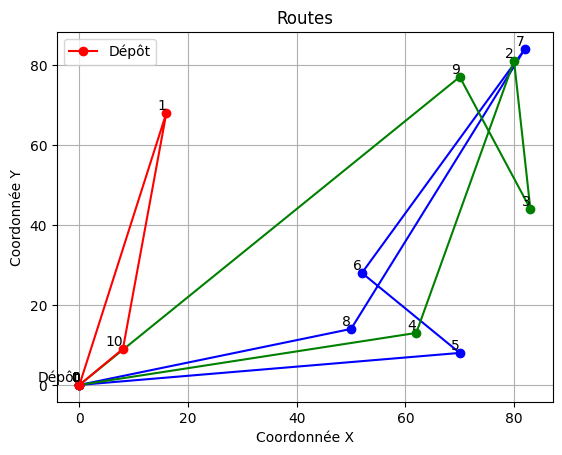

In [ ]:
import matplotlib.pyplot as plt

def plot_routes(routes, distance_matrix):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Liste de couleurs prédéfinies

    for i, (route, _, _) in enumerate(routes):
        x_coords = []
        y_coords = []
        for client in route[:]:
            x = client_coordinates[client][0]
            y = client_coordinates[client][1]
            x_coords.append(x)
            y_coords.append(y)
            plt.plot(x, y, marker='o', color=colors[i % len(colors)])  # Attribution de la couleur

            plt.text(x, y, str(client), verticalalignment='bottom', horizontalalignment='right')

        plt.plot(x_coords + [x_coords[0]], y_coords + [y_coords[0]], color=colors[i % len(colors)])

    # Affichage du dépôt
    depot_x = client_coordinates[0][0]
    depot_y = client_coordinates[0][1]
    plt.plot(depot_x, depot_y, marker='o', color='red', label='Dépôt')
    plt.text(depot_x, depot_y, 'Dépôt', verticalalignment='bottom', horizontalalignment='right')

    plt.xlabel('Coordonnée X')
    plt.ylabel('Coordonnée Y')
    plt.title('Routes')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_routes(routes, distance_matrix)